In [45]:
from splinter import Browser
from bs4 import BeautifulSoup as bs
import time
from webdriver_manager.chrome import ChromeDriverManager
import os
import requests
from pprint import pprint
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
 # Set up Splinter
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

# visit mars temperature data site
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

# scrapping information from site
tables = pd.read_html(url)
tables

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [9]:
# converting to pandas data frame
mars_df = tables[0]
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [64]:
# checking data types
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [65]:
# converting terrestrial_date to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

Questions
-How many months exist on Mars?
-Which month, on average, has the lowest temperature? The highest?
-Which month, on average, has the lowest atmospheric pressure? The highest?
-How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.

In [66]:
# How many months exist on Mars?
months = mars_df['month'].nunique()
# https://www.statology.org/pandas-count-unique-values/#:~:text=You%20can%20use%20the%20nunique,values%20in%20a%20pandas%20DataFrame.
print(f"There are ", months, " months on Mars")

There are  12  months on Mars


In [67]:
# Which month, on average, has the lowest temperature? The highest?
lowest_month = mars_df.groupby('month')
temp = lowest_month[['min_temp']].mean()

temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


In [68]:
# finding the month with the lowest temperature on average
lowest_temp = temp[temp['min_temp'] == temp['min_temp'].min()]
print(lowest_temp)



        min_temp
month           
3     -83.307292


In [69]:
# finding the month with the highest temperature on average
highest_temp = temp[temp['min_temp'] == temp['min_temp'].max()]
print(highest_temp)

        min_temp
month           
8     -68.382979


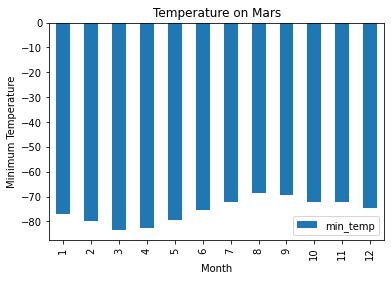

In [70]:
# creating visualization for temperature
temp.plot(kind='bar')
plt.title('Temperature on Mars')
plt.xlabel('Month')
plt.ylabel('Minimum Temperature')
plt.show()

In [71]:
# Which month, on average, has the lowest atmospheric pressure? The highest?
# finding the average atmoshperic pressure per month
mars_pressure = mars_df.groupby('month')
pressure = mars_pressure[['pressure']].mean()
pressure


,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


In [72]:
# finding the lowest atmospheric pressure
lowest_pressure = pressure[pressure['pressure'] == pressure['pressure'].min()]
print(lowest_pressure)

         pressure
month            
6      745.054422


In [73]:
# finding the highest atmospheric pressure
highest_pressure = pressure[pressure['pressure'] == pressure['pressure'].max()]
print(highest_pressure)

        pressure
month           
9      913.30597


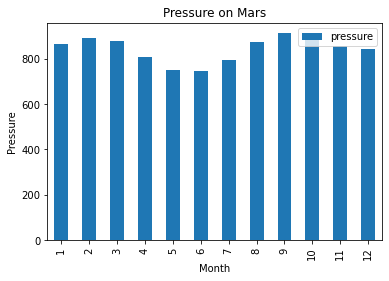

In [74]:
# creating visualization for pressure
pressure.plot(kind='bar')
plt.title('Pressure on Mars')
plt.xlabel('Month')
plt.ylabel('Pressure')
plt.show()


In [75]:
# How many terrestrial days exist in a Martian year? A visual estimate within 25% was made.
terrestrial = mars_df['terrestrial_date']

print(f'There are ', terrestrial.count(), " terrestrial days on Mars")

There are  1867  terrestrial days on Mars


In [77]:
# exporting data frame to csv 
mars_df.to_csv('mars.csv', index=False)